## Loading data and preliminary analysis

In [1]:
# import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import string
import re
import joblib 
import json
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dense, Flatten, Conv1D, MaxPooling1D, SimpleRNN, GRU, LSTM, LSTM, Input, Embedding, TimeDistributed, Flatten, Dropout,Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
# load data
with open('intents.json') as file:
  data = json.load(file)

data

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi',
    'How are you',
    'Is anyone there?',
    'Hello',
    'Good day',
    'Whats up'],
   'responses': ['Hello!',
    'Good to see you again!',
    'Hi there, how can I help?'],
   'context_set': ''},
  {'tag': 'goodbye',
   'patterns': ['cya',
    'See you later',
    'Goodbye',
    'I am Leaving',
    'Have a Good day'],
   'responses': ['Sad to see you go :(', 'Talk to you later', 'Goodbye!'],
   'context_set': ''},
  {'tag': 'age',
   'patterns': ['how old',
    'how old is Sadie',
    'what is your age',
    'how old are you',
    'age?'],
   'responses': ['I am 21 days old!', '21 days young!'],
   'context_set': ''},
  {'tag': 'name',
   'patterns': ['what is your name',
    'what should I call you',
    'whats your name?'],
   'responses': ['You can call me Sadie.',
    "I'm Sadie!",
    "I'm sadie aka from stranger things."],
   'context_set': ''},
  {'tag': 'depression',
   'patterns': ['What Is Depression?', 'Depression

In [3]:
# convert to dataframes 
 
def frame_data(feat_1,feat_2,is_pattern):
  x = is_pattern #True
  df = pd.DataFrame(columns=[feat_1,feat_2])
  for intent in data['intents']:
    if x:
      for pattern in intent['patterns']:
        w = pattern
        df_to_append = pd.Series([w,intent['tag']], index = df.columns)
        df = df.append(df_to_append,ignore_index=True)
    else:
      for response in intent['responses']:
        w = response
        df_to_append = pd.Series([w,intent['tag']], index = df.columns)
        df = df.append(df_to_append,ignore_index=True)
  return df

In [4]:
df1 = frame_data('questions','labels',True)

<ipython-input-3-3acd54fdad57>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [5]:
df1

,questions,labels
0,Hi,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting
...,...,...
63,I am a victim of bullying,bully
64,I am afraid to complain against bullying,bully2
65,I want to leave the country and run away,runaway
66,I can't do this anymore,quitting


In [6]:
# no of patterns

(df1.labels.value_counts(sort=False))

greeting      6
goodbye       5
age           5
name          3
depression    2
parents       2
types         2
capable       1
stress        2
suicide       3
fail          2
causes        3
age group     1
country       2
school        2
world         1
anxiety       2
oversleep     1
sleepless     2
diabetes      2
duration      1
effects       1
333           2
lonely        1
like          1
ugly          1
nothing       1
better        1
hate          1
winning       2
break         1
sad           1
bully         1
bully2        1
runaway       1
quitting      1
time          1
Name: labels, dtype: int64

In [7]:
df2 = frame_data('response','labels',False)
(df2.labels.value_counts(sort=False))

<ipython-input-3-3acd54fdad57>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

<ipython-input-3-3acd54fdad57>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
<ipython-input-3-3acd54fdad57>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

greeting      3
goodbye       3
age           2
name          3
depression    3
parents       2
types         1
capable       2
stress        4
suicide       4
fail          4
causes        3
age group     1
country       1
school        1
world         1
anxiety       1
oversleep     1
sleepless     1
diabetes      2
duration      1
effects       1
333           1
lonely        1
like          1
ugly          1
nothing       1
better        1
hate          1
winning       2
break         1
sad           2
bully         2
bully2        2
runaway       1
quitting      1
time          1
Name: labels, dtype: int64

## Data preprocessing

In [8]:
# preprocessing text

lemmatizer = WordNetLemmatizer()

vocab = Counter()
labels = []
def tokenizer(entry):
    tokens = entry.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [lemmatizer.lemmatize(w.lower()) for w in tokens]
    tokens = [word.lower() for word in tokens if len(word) > 1]
    #print(tokens)
    return tokens

def remove_stop_words(tokenizer,df,feature):
    doc_without_stopwords = []
    for entry in df[feature]:
        tokens = tokenizer(entry)
        joblib.dump(tokens,'tokens.pkl')
        doc_without_stopwords.append(' '.join(tokens))
    df[feature] = doc_without_stopwords
    print("qwerty")
    print (df[feature])
    return

In [9]:
def create_vocab(tokenizer,df,feature):
    for entry in df[feature]:
        tokens = tokenizer(entry)   
        vocab.update(tokens)
    joblib.dump(vocab,'vocab.pkl')
    return

In [10]:
create_vocab(tokenizer,df1,'questions')

In [11]:
vocab

Counter({'hi': 1,
         'how': 6,
         'are': 6,
         'you': 6,
         'is': 13,
         'anyone': 1,
         'there': 1,
         'hello': 1,
         'good': 4,
         'day': 2,
         'whats': 2,
         'up': 1,
         'cya': 1,
         'see': 1,
         'later': 1,
         'goodbye': 1,
         'am': 12,
         'leaving': 1,
         'have': 2,
         'old': 3,
         'sadie': 1,
         'what': 11,
         'your': 3,
         'age': 3,
         'name': 2,
         'should': 1,
         'call': 1,
         'depression': 20,
         'meaning': 2,
         'feel': 2,
         'let': 1,
         'my': 3,
         'parent': 2,
         'down': 1,
         'proud': 1,
         'of': 16,
         'me': 2,
         'the': 12,
         'type': 1,
         'variation': 1,
         'for': 6,
         'nothing': 2,
         'feeling': 1,
         'stressed': 2,
         'lately': 1,
         'out': 1,
         'want': 3,
         'to': 4,
         'kill': 1

In [12]:
vocab_size = len(vocab)
vocab_size

131

In [13]:
# test_list contains the first element of questions

test_list = list(df1.groupby(by='labels',as_index=False).first()['questions'])
test_list

['What is the 3 3 3 rule for anxiety?',
 'how old',
 'Which age group has the highest rate of depression?',
 'What is the meaning of anxiety and depression?',
 'I wish I was better than them',
 'I want a break',
 'I am a victim of bullying',
 'I am afraid to complain against bullying',
 'I am good for nothing',
 'What are the causes of depression?',
 'Which country has the highest rate of depression?',
 'What Is Depression?',
 'Is depression a side effect of diabetes?',
 'How long can Anxiety last?',
 'Why is depression bad for you?',
 'i am afraid i will fail again',
 'cya',
 'Hi',
 'I hate myself!',
 'No one likes me!',
 'I am lonely!',
 'what is your name',
 'I am good for nothing!',
 'Does oversleeping cause depression?',
 'I feel i have let my parents down',
 "I can't do this anymore",
 'I want to leave the country and run away',
 'I am sad',
 'Is school a cause of depression?',
 'Can lack of sleep make you feel sad?',
 'I am feeling stressed lately',
 'i want to kill myself',
 'M

In [14]:
# indices of the testing dataset

test_index = []
for i,_ in enumerate(test_list):
    idx = df1[df1.questions == test_list[i]].index[0]
    test_index.append(idx)
test_index

[51,
 11,
 36,
 42,
 57,
 61,
 63,
 64,
 25,
 33,
 37,
 19,
 47,
 49,
 50,
 31,
 6,
 0,
 58,
 54,
 53,
 16,
 56,
 44,
 21,
 66,
 65,
 62,
 39,
 45,
 26,
 28,
 67,
 23,
 55,
 59,
 41]

In [15]:
# train indices are the all indices minus the testing indices 

train_index = [i for i in df1.index]
train_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67]

In [16]:
def convert_seq(df,feature):
#     text = ' '.join(list(vocab.keys()))
    t = Tokenizer()
    entries = [entry for entry in df[feature]]
    print(entries)
    print('----')
    t.fit_on_texts(entries)
    joblib.dump(t,'tokenizer_t.pkl')   # why a pkl file
    vocab_size = len(t.word_index) +1 # +1 for oov 
    print(t.word_index)
    entries = [entry for entry in df[feature]]
    max_length = max([len(s.split()) for s in entries])
    print('----')
    print("max length of string is : ",max_length)
    print('----')
    encoded = t.texts_to_sequences(entries)
    print(encoded)
    padded = pad_sequences(encoded, maxlen=max_length, padding='pre')
    print('----')
    print(padded)
    return padded, vocab_size

In [17]:
X,vocab_size = convert_seq(df1,'questions')

['Hi', 'How are you', 'Is anyone there?', 'Hello', 'Good day', 'Whats up', 'cya', 'See you later', 'Goodbye', 'I am Leaving', 'Have a Good day', 'how old', 'how old is Sadie', 'what is your age', 'how old are you', 'age?', 'what is your name', 'what should I call you', 'whats your name?', 'What Is Depression?', 'Depression meaning', 'I feel i have let my parents down', ' are my parents proud of me', 'What are the types of depression?', 'variations of depression', 'I am good for nothing', 'I am feeling stressed lately', 'I am stressed out', 'i want to kill myself', 'i am thinking of suicide', 'i like to end things for myself', 'i am afraid i will fail again', 'I will never succeed in life', 'What are the causes of depression?', 'What are the top causes of depression?', 'What is the biological cause of depression?', 'Which age group has the highest rate of depression?', 'Which country has the highest rate of depression?', 'Which country has the lowest rate of depression?', 'Is school a c

In [18]:
with open('tokenizer_t.pkl', 'rb') as f:
    data = pickle.load(f)

In [19]:
data.word_counts

OrderedDict([('hi', 1),
             ('how', 6),
             ('are', 6),
             ('you', 6),
             ('is', 13),
             ('anyone', 1),
             ('there', 1),
             ('hello', 1),
             ('good', 4),
             ('day', 2),
             ('whats', 2),
             ('up', 1),
             ('cya', 1),
             ('see', 1),
             ('later', 1),
             ('goodbye', 1),
             ('i', 29),
             ('am', 12),
             ('leaving', 1),
             ('have', 2),
             ('a', 7),
             ('old', 3),
             ('sadie', 1),
             ('what', 11),
             ('your', 3),
             ('age', 3),
             ('name', 2),
             ('should', 1),
             ('call', 1),
             ('depression', 20),
             ('meaning', 2),
             ('feel', 2),
             ('let', 1),
             ('my', 3),
             ('parents', 2),
             ('down', 1),
             ('proud', 1),
             ('of', 16),
     

In [20]:
df_encoded = pd.DataFrame(X)

In [21]:
df_encoded

,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,0,51
1,0,0,0,0,0,0,9,10,11
2,0,0,0,0,0,0,4,52,53
3,0,0,0,0,0,0,0,0,54
4,0,0,0,0,0,0,0,15,31
...,...,...,...,...,...,...,...,...,...
63,0,0,0,1,5,8,125,3,50
64,0,0,1,5,41,16,126,127,50
65,1,23,16,128,6,27,29,129,130
66,0,0,0,0,1,131,132,133,134


In [22]:
df_encoded['labels'] = df1.labels
df_encoded.head(10)

,0,1,2,3,4,5,6,7,8,labels
0,0,0,0,0,0,0,0,0,51,greeting
1,0,0,0,0,0,0,9,10,11,greeting
2,0,0,0,0,0,0,4,52,53,greeting
3,0,0,0,0,0,0,0,0,54,greeting
4,0,0,0,0,0,0,0,15,31,greeting
5,0,0,0,0,0,0,0,32,55,greeting
6,0,0,0,0,0,0,0,0,56,goodbye
7,0,0,0,0,0,0,57,11,58,goodbye
8,0,0,0,0,0,0,0,0,59,goodbye
9,0,0,0,0,0,0,1,5,60,goodbye


In [23]:
from sklearn.preprocessing import LabelEncoder
lable_enc = LabelEncoder()

# encoding the labels

labl = lable_enc.fit_transform(df_encoded.labels)
labl

array([17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16,  1,  1,  1,  1,  1, 21,
       21, 21, 11, 11, 24, 24, 33, 33,  8, 30, 30, 31, 31, 31, 15, 15,  9,
        9,  9,  2, 10, 10, 28, 28, 36,  3,  3, 23, 29, 29, 12, 12, 13, 14,
        0,  0, 20, 19, 34, 22,  4, 18, 35, 35,  5, 27,  6,  7, 26, 25, 32])

In [24]:
mapper = {}
for index,key in enumerate(df_encoded.labels):
    if key not in mapper.keys():
        mapper[key] = labl[index]
mapper

{'greeting': 17,
 'goodbye': 16,
 'age': 1,
 'name': 21,
 'depression': 11,
 'parents': 24,
 'types': 33,
 'capable': 8,
 'stress': 30,
 'suicide': 31,
 'fail': 15,
 'causes': 9,
 'age group': 2,
 'country': 10,
 'school': 28,
 'world': 36,
 'anxiety': 3,
 'oversleep': 23,
 'sleepless': 29,
 'diabetes': 12,
 'duration': 13,
 'effects': 14,
 '333': 0,
 'lonely': 20,
 'like': 19,
 'ugly': 34,
 'nothing': 22,
 'better': 4,
 'hate': 18,
 'winning': 35,
 'break': 5,
 'sad': 27,
 'bully': 6,
 'bully2': 7,
 'runaway': 26,
 'quitting': 25,
 'time': 32}

In [25]:
df2.labels = df2.labels.map(mapper).astype({'labels': 'int32'})
df2

,response,labels
0,Hello!,17
1,Good to see you again!,17
2,"Hi there, how can I help?",17
3,Sad to see you go :(,16
4,Talk to you later,16
...,...,...
59,Bullying is very wrong and you shouldn't let a...,7
60,I highly recommend you to stand for yourself a...,7
61,Why do you want to spend so much on this thoug...,26
62,If you are really that exhausted you definitel...,25


In [26]:
df2.to_csv('response.csv',index=False)

In [27]:
train = df_encoded.loc[train_index]
test = df_encoded.loc[test_index]

## Training and testing

In [28]:
train

,0,1,2,3,4,5,6,7,8,labels
0,0,0,0,0,0,0,0,0,51,greeting
1,0,0,0,0,0,0,9,10,11,greeting
2,0,0,0,0,0,0,4,52,53,greeting
3,0,0,0,0,0,0,0,0,54,greeting
4,0,0,0,0,0,0,0,15,31,greeting
...,...,...,...,...,...,...,...,...,...,...
63,0,0,0,1,5,8,125,3,50,bully
64,0,0,1,5,41,16,126,127,50,bully2
65,1,23,16,128,6,27,29,129,130,runaway
66,0,0,0,0,1,131,132,133,134,quitting


In [29]:
test

,0,1,2,3,4,5,6,7,8,labels
51,7,4,6,14,14,14,47,12,18,333
11,0,0,0,0,0,0,0,9,19,age
36,25,21,86,17,6,44,26,3,2,age group
42,0,7,4,6,35,3,18,29,2,anxiety
57,0,0,1,48,1,116,117,118,119,better
61,0,0,0,0,0,1,23,8,124,break
63,0,0,0,1,5,8,125,3,50,bully
64,0,0,1,5,41,16,126,127,50,bully2
25,0,0,0,0,1,5,15,12,39,capable
33,0,0,0,7,10,6,43,3,2,causes


In [30]:
train.labels.value_counts()

greeting      6
age           5
goodbye       5
name          3
suicide       3
causes        3
country       2
winning       2
333           2
diabetes      2
anxiety       2
school        2
sleepless     2
stress        2
types         2
parents       2
depression    2
fail          2
age group     1
better        1
quitting      1
runaway       1
bully2        1
bully         1
sad           1
break         1
hate          1
ugly          1
nothing       1
like          1
lonely        1
effects       1
duration      1
capable       1
oversleep     1
world         1
time          1
Name: labels, dtype: int64

In [31]:
test.labels.value_counts()

333           1
like          1
name          1
nothing       1
oversleep     1
parents       1
quitting      1
runaway       1
sad           1
school        1
sleepless     1
stress        1
suicide       1
time          1
types         1
ugly          1
winning       1
lonely        1
hate          1
age           1
greeting      1
age group     1
anxiety       1
better        1
break         1
bully         1
bully2        1
capable       1
causes        1
country       1
depression    1
diabetes      1
duration      1
effects       1
fail          1
goodbye       1
world         1
Name: labels, dtype: int64

In [32]:
X_train = train.drop(columns=['labels'],axis=1)
y_train = train.labels
X_test = test.drop(columns=['labels'],axis=1)
y_test = test.labels
print(X_train)
print("------")
print(y_train)

    0   1   2    3   4    5    6    7    8
0   0   0   0    0   0    0    0    0   51
1   0   0   0    0   0    0    9   10   11
2   0   0   0    0   0    0    4   52   53
3   0   0   0    0   0    0    0    0   54
4   0   0   0    0   0    0    0   15   31
.. ..  ..  ..  ...  ..  ...  ...  ...  ...
63  0   0   0    1   5    8  125    3   50
64  0   0   1    5  41   16  126  127   50
65  1  23  16  128   6   27   29  129  130
66  0   0   0    0   1  131  132  133  134
67  0   0   0    0   0   22  135   17  136

[68 rows x 9 columns]
------
0     greeting
1     greeting
2     greeting
3     greeting
4     greeting
        ...   
63       bully
64      bully2
65     runaway
66    quitting
67        time
Name: labels, Length: 68, dtype: object


In [33]:
y_train =pd.get_dummies(y_train).values
y_test =pd.get_dummies(y_test).values

In [34]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [36]:
y_train[0].shape,y_test[0].shape

((37,), (37,))

In [37]:
X_train.shape

(68, 9)

In [38]:
y_train.shape

(68, 37)

In [39]:
max_length = X_train.shape[1]
output = 37    

In [40]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10) #patience : number of epochs with no improvement after which training will be stopped

checkpoint = ModelCheckpoint("model-v1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

callbacks = [early_stopping,checkpoint,reduce_lr]

## RNN

In [41]:
def define_model1(vocab_size, max_length):
    model1 = Sequential()
    model1.add(Embedding(vocab_size,100, input_length=max_length))
    model1.add(SimpleRNN(100))
    model1.add(Dense(37, activation='softmax'))   
    
    model1.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    # summarize defined model
    model1.summary()
    plot_model(model1, to_file='model_1.png', show_shapes=True)
    return model1

In [42]:
model1 = define_model1(vocab_size, max_length)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 9, 100)            13700     
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               20100     
                                                                 
 dense (Dense)               (None, 37)                3737      
                                                                 
Total params: 37,537
Trainable params: 37,537
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [43]:
history1 = model1.fit(X_train, y_train, epochs=50, verbose=1,validation_data=(X_test,y_test),callbacks=callbacks)#,callbacks=callbacks)

Epoch 1/50
1/3 [=========>....................] - ETA: 3s - loss: 3.6181 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 3.49567, saving model to model-v1.h5
3/3 [==============================] - 2s 228ms/step - loss: 3.6000 - accuracy: 0.0441 - val_loss: 3.4957 - val_accuracy: 0.1622 - lr: 0.0010
Epoch 2/50
1/3 [=========>....................] - ETA: 0s - loss: 3.4638 - accuracy: 0.2500
Epoch 2: val_loss improved from 3.49567 to 3.41309, saving model to model-v1.h5
3/3 [==============================] - 0s 45ms/step - loss: 3.4352 - accuracy: 0.2794 - val_loss: 3.4131 - val_accuracy: 0.1622 - lr: 0.0010
Epoch 3/50
1/3 [=========>....................] - ETA: 0s - loss: 3.2989 - accuracy: 0.3125
Epoch 3: val_loss improved from 3.41309 to 3.36503, saving model to model-v1.h5
3/3 [==============================] - 0s 47ms/step - loss: 3.2985 - accuracy: 0.2647 - val_loss: 3.3650 - val_accuracy: 0.1351 - lr: 0.0010
Epoch 4/50
1/3 [=========>....................] - ETA: 0s - 

1/3 [=========>....................] - ETA: 0s - loss: 1.2760 - accuracy: 0.8125
Epoch 27: val_loss improved from 1.22084 to 1.17969, saving model to model-v1.h5
3/3 [==============================] - 0s 41ms/step - loss: 1.1417 - accuracy: 0.8382 - val_loss: 1.1797 - val_accuracy: 0.7568 - lr: 0.0010
Epoch 28/50
1/3 [=========>....................] - ETA: 0s - loss: 1.1230 - accuracy: 0.7500
Epoch 28: val_loss improved from 1.17969 to 1.11160, saving model to model-v1.h5
3/3 [==============================] - 0s 45ms/step - loss: 1.0911 - accuracy: 0.8235 - val_loss: 1.1116 - val_accuracy: 0.7568 - lr: 0.0010
Epoch 29/50
1/3 [=========>....................] - ETA: 0s - loss: 1.0508 - accuracy: 0.7812
Epoch 29: val_loss improved from 1.11160 to 1.03131, saving model to model-v1.h5
3/3 [==============================] - 0s 40ms/step - loss: 1.0318 - accuracy: 0.8529 - val_loss: 1.0313 - val_accuracy: 0.8378 - lr: 0.0010
Epoch 30/50
1/3 [=========>....................] - ETA: 0s - loss: 

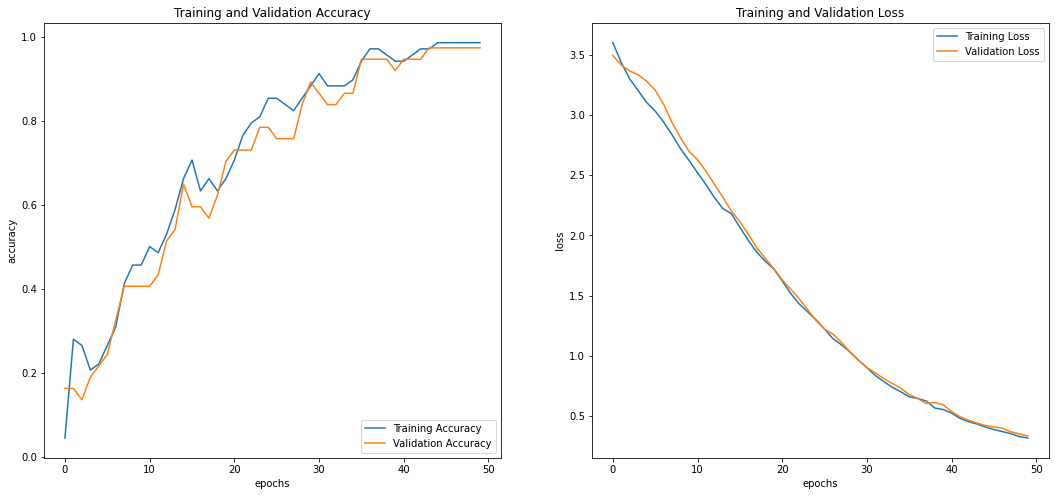

In [44]:
# Learning curves 

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## CNN

In [45]:
def define_model2(vocab_size, max_length):
    model2 = Sequential()
    model2.add(Embedding(vocab_size,300, input_length=max_length))
    model2.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
    model2.add(MaxPooling1D(pool_size = 4))
    model2.add(Flatten())
    model2.add(Dense(32, activation='relu'))
    model2.add(Dense(37, activation='softmax'))
    
    model2.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    # summarize defined model
    model2.summary()
    return model2

In [46]:
model2 = define_model2(vocab_size, max_length)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 9, 300)            41100     
                                                                 
 conv1d (Conv1D)             (None, 8, 32)             19232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 37)                1221      
                                                      

In [47]:
history = model2.fit(X_train, y_train, epochs=70, verbose=1,validation_data=(X_test,y_test),callbacks=callbacks)

Epoch 1/70
1/3 [=========>....................] - ETA: 2s - loss: 3.6105 - accuracy: 0.0312
Epoch 1: val_loss did not improve from 0.33426
3/3 [==============================] - 1s 146ms/step - loss: 3.6121 - accuracy: 0.0294 - val_loss: 3.5813 - val_accuracy: 0.1622 - lr: 0.0010
Epoch 2/70
1/3 [=========>....................] - ETA: 0s - loss: 3.5753 - accuracy: 0.1562
Epoch 2: val_loss did not improve from 0.33426
3/3 [==============================] - 0s 25ms/step - loss: 3.5709 - accuracy: 0.1618 - val_loss: 3.5583 - val_accuracy: 0.2162 - lr: 0.0010
Epoch 3/70
1/3 [=========>....................] - ETA: 0s - loss: 3.5555 - accuracy: 0.2812
Epoch 3: val_loss did not improve from 0.33426
3/3 [==============================] - 0s 27ms/step - loss: 3.5430 - accuracy: 0.2500 - val_loss: 3.5365 - val_accuracy: 0.2432 - lr: 0.0010
Epoch 4/70
1/3 [=========>....................] - ETA: 0s - loss: 3.5092 - accuracy: 0.3125
Epoch 4: val_loss did not improve from 0.33426
3/3 [===============

1/3 [=========>....................] - ETA: 0s - loss: 1.7358 - accuracy: 0.5938
Epoch 30: val_loss did not improve from 0.33426
3/3 [==============================] - 0s 22ms/step - loss: 1.7380 - accuracy: 0.5735 - val_loss: 2.0415 - val_accuracy: 0.4054 - lr: 0.0010
Epoch 31/70
1/3 [=========>....................] - ETA: 0s - loss: 1.6149 - accuracy: 0.5938
Epoch 31: val_loss did not improve from 0.33426
3/3 [==============================] - 0s 23ms/step - loss: 1.6545 - accuracy: 0.5735 - val_loss: 1.9578 - val_accuracy: 0.4324 - lr: 0.0010
Epoch 32/70
1/3 [=========>....................] - ETA: 0s - loss: 1.7243 - accuracy: 0.5625
Epoch 32: val_loss did not improve from 0.33426
3/3 [==============================] - 0s 22ms/step - loss: 1.5681 - accuracy: 0.5882 - val_loss: 1.8683 - val_accuracy: 0.4595 - lr: 0.0010
Epoch 33/70
1/3 [=========>....................] - ETA: 0s - loss: 1.3047 - accuracy: 0.7500
Epoch 33: val_loss did not improve from 0.33426
3/3 [====================

Epoch 59/70
1/3 [=========>....................] - ETA: 0s - loss: 0.2390 - accuracy: 0.9688
Epoch 59: val_loss improved from 0.29584 to 0.27174, saving model to model-v1.h5
3/3 [==============================] - 0s 37ms/step - loss: 0.2249 - accuracy: 0.9853 - val_loss: 0.2717 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 60/70
1/3 [=========>....................] - ETA: 0s - loss: 0.1668 - accuracy: 0.9688
Epoch 60: val_loss improved from 0.27174 to 0.25293, saving model to model-v1.h5
3/3 [==============================] - 0s 38ms/step - loss: 0.2076 - accuracy: 0.9853 - val_loss: 0.2529 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 61/70
1/3 [=========>....................] - ETA: 0s - loss: 0.1915 - accuracy: 0.9688
Epoch 61: val_loss improved from 0.25293 to 0.23672, saving model to model-v1.h5
3/3 [==============================] - 0s 36ms/step - loss: 0.1927 - accuracy: 0.9853 - val_loss: 0.2367 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 62/70
1/3 [=========>....................] - ETA:

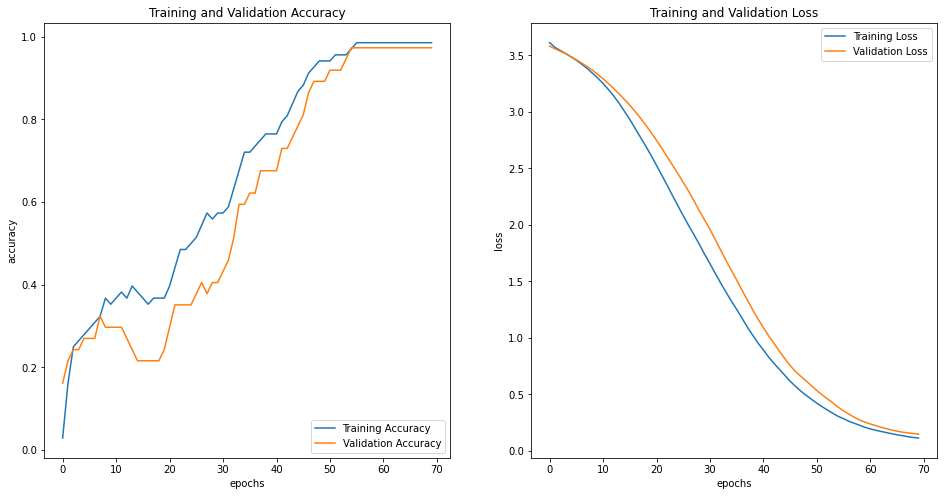

In [48]:
# Learning curves 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## LSTM

In [49]:
def define_model3(vocab_size, max_length):
    model3 = Sequential()
    model3.add(Embedding(vocab_size,300, input_length=max_length))
    model3.add(LSTM(500))
    model3.add(Dense(37, activation='softmax'))
    
    model3.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    # summarize defined model
    model3.summary()
    return model3

In [50]:
model3 = define_model3(vocab_size, max_length)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 9, 300)            41100     
                                                                 
 lstm (LSTM)                 (None, 500)               1602000   
                                                                 
 dense_3 (Dense)             (None, 37)                18537     
                                                                 
Total params: 1,661,637
Trainable params: 1,661,637
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model3.fit(X_train, y_train, epochs=50, verbose=1,validation_data=(X_test,y_test))

Epoch 1/50
3/3 [==============================] - 4s 511ms/step - loss: 3.6039 - accuracy: 0.0588 - val_loss: 3.5625 - val_accuracy: 0.0541
Epoch 2/50
3/3 [==============================] - 0s 90ms/step - loss: 3.5045 - accuracy: 0.1324 - val_loss: 3.5105 - val_accuracy: 0.0541
Epoch 3/50
3/3 [==============================] - 0s 117ms/step - loss: 3.3319 - accuracy: 0.1176 - val_loss: 3.6127 - val_accuracy: 0.0541
Epoch 4/50
3/3 [==============================] - 0s 102ms/step - loss: 3.2550 - accuracy: 0.1176 - val_loss: 3.4789 - val_accuracy: 0.0811
Epoch 5/50
3/3 [==============================] - 0s 112ms/step - loss: 3.2053 - accuracy: 0.1176 - val_loss: 3.4252 - val_accuracy: 0.1351
Epoch 6/50
3/3 [==============================] - 0s 103ms/step - loss: 3.1786 - accuracy: 0.1471 - val_loss: 3.3265 - val_accuracy: 0.2162
Epoch 7/50
3/3 [==============================] - 0s 98ms/step - loss: 3.1168 - accuracy: 0.2500 - val_loss: 3.2911 - val_accuracy: 0.1892
Epoch 8/50
3/3 [======

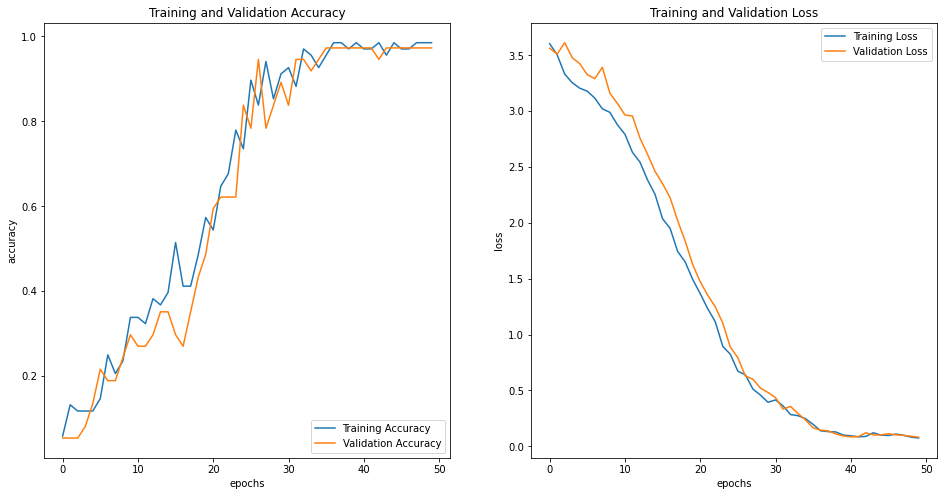

In [52]:
# Learning curves 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## GRU

In [53]:
def define_model4(vocab_size, max_length):
    model4 = Sequential()
    model4.add(Embedding(vocab_size,300, input_length=max_length))
    model4.add(GRU(500))
    model4.add(Dense(37, activation='softmax'))
    
    model4.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    # summarize defined model
    model4.summary()
    return model4

In [54]:
model4 = define_model4(vocab_size, max_length)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 9, 300)            41100     
                                                                 
 gru (GRU)                   (None, 500)               1203000   
                                                                 
 dense_4 (Dense)             (None, 37)                18537     
                                                                 
Total params: 1,262,637
Trainable params: 1,262,637
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model4.fit(X_train, y_train, epochs=40, verbose=1,validation_data=(X_test,y_test))

Epoch 1/40
3/3 [==============================] - 4s 389ms/step - loss: 3.6058 - accuracy: 0.0588 - val_loss: 3.5452 - val_accuracy: 0.1892
Epoch 2/40
3/3 [==============================] - 0s 80ms/step - loss: 3.4941 - accuracy: 0.2500 - val_loss: 3.4768 - val_accuracy: 0.0811
Epoch 3/40
3/3 [==============================] - 0s 79ms/step - loss: 3.3376 - accuracy: 0.1176 - val_loss: 3.5558 - val_accuracy: 0.0270
Epoch 4/40
3/3 [==============================] - 0s 78ms/step - loss: 3.2992 - accuracy: 0.1029 - val_loss: 3.4057 - val_accuracy: 0.0811
Epoch 5/40
3/3 [==============================] - 0s 79ms/step - loss: 3.0845 - accuracy: 0.1765 - val_loss: 3.3053 - val_accuracy: 0.2973
Epoch 6/40
3/3 [==============================] - 0s 85ms/step - loss: 3.1224 - accuracy: 0.3824 - val_loss: 3.2424 - val_accuracy: 0.3784
Epoch 7/40
3/3 [==============================] - 0s 79ms/step - loss: 3.0588 - accuracy: 0.4706 - val_loss: 3.1505 - val_accuracy: 0.3784
Epoch 8/40
3/3 [==========

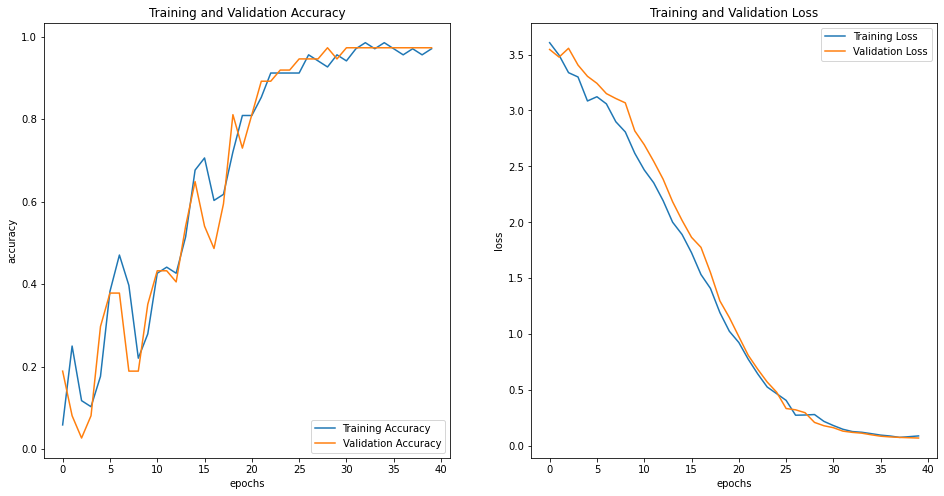

In [56]:
# Learning curves 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## BiLSTM

In [57]:
def define_model5(vocab_size, max_length):
    model5 = Sequential()
    model5.add(Embedding(vocab_size,300, input_length=max_length))
    model5.add(Bidirectional(LSTM(500)))
    model5.add(Dense(37, activation='softmax'))
    
    model5.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    # summarize defined model
    model5.summary()
    return model5

In [58]:
model5 = define_model5(vocab_size, max_length)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 9, 300)            41100     
                                                                 
 bidirectional (Bidirectiona  (None, 1000)             3204000   
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 37)                37037     
                                                                 
Total params: 3,282,137
Trainable params: 3,282,137
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model5.fit(X_train, y_train, epochs=40, verbose=1,validation_data=(X_test,y_test))

Epoch 1/40
3/3 [==============================] - 6s 744ms/step - loss: 3.6017 - accuracy: 0.0441 - val_loss: 3.5556 - val_accuracy: 0.0541
Epoch 2/40
3/3 [==============================] - 0s 144ms/step - loss: 3.4598 - accuracy: 0.0882 - val_loss: 3.5256 - val_accuracy: 0.0541
Epoch 3/40
3/3 [==============================] - 1s 184ms/step - loss: 3.2753 - accuracy: 0.1029 - val_loss: 3.6418 - val_accuracy: 0.0811
Epoch 4/40
3/3 [==============================] - 1s 183ms/step - loss: 3.1985 - accuracy: 0.1765 - val_loss: 3.3864 - val_accuracy: 0.1622
Epoch 5/40
3/3 [==============================] - 1s 189ms/step - loss: 3.0446 - accuracy: 0.2353 - val_loss: 3.2511 - val_accuracy: 0.2973
Epoch 6/40
3/3 [==============================] - 1s 171ms/step - loss: 2.9078 - accuracy: 0.3088 - val_loss: 3.1434 - val_accuracy: 0.1351
Epoch 7/40
3/3 [==============================] - 1s 186ms/step - loss: 2.7826 - accuracy: 0.1618 - val_loss: 3.0584 - val_accuracy: 0.0811
Epoch 8/40
3/3 [====

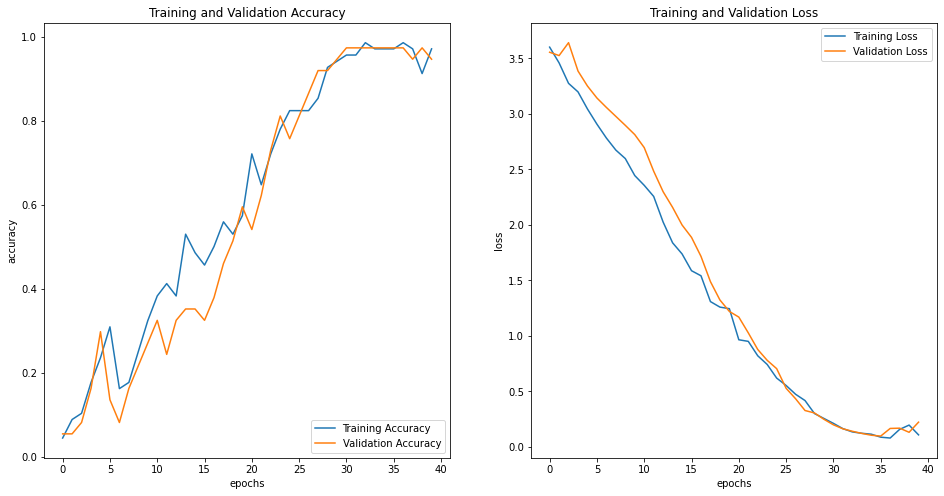

In [60]:
# Learning curves 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predictions

In [61]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [62]:
def get_text(str_text):
    # print(str_text)
    input_text  = [str_text]
    df_input = pd.DataFrame(input_text,columns=['questions'])
    df_input
    return df_input

In [68]:
from tensorflow.keras.models import load_model
model = model6
tokenizer_t = joblib.load('tokenizer_t.pkl')
vocab = joblib.load('vocab.pkl')

In [69]:
def tokenizer(entry):
    tokens = entry.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [lemmatizer.lemmatize(w.lower()) for w in tokens]
    # stop_words = set(stopwords.words('english'))
    # tokens = [w for w in tokens if not w in stop_words]
    tokens = [word.lower() for word in tokens if len(word) > 1]
    return tokens

In [70]:
def remove_stop_words_for_input(tokenizer,df,feature):
    doc_without_stopwords = []
    entry = df[feature][0]
    tokens = tokenizer(entry)
    doc_without_stopwords.append(' '.join(tokens))
    df[feature] = doc_without_stopwords
    return df

In [71]:
def encode_input_text(tokenizer_t,df,feature):
    t = tokenizer_t
    entry = [df[feature][0]]
    encoded = t.texts_to_sequences(entry)
    padded = pad_sequences(encoded, maxlen=9, padding='pre')
    return padded

In [72]:
def get_pred(model,encoded_input):
    pred = np.argmax(model.predict(encoded_input))
    return pred

In [73]:
def bot_precausion(df_input,pred):
    words = df_input.questions[0].split()
    if len([w for w in words if w in vocab])==0 :
        pred = 1
    return pred

In [74]:
def get_response(df2,pred):
    upper_bound = df2.groupby('labels').get_group(pred).shape[0]
    r = np.random.randint(0,upper_bound)
    responses = list(df2.groupby('labels').get_group(pred).response)
    return responses[r]

In [75]:
def bot_response(response,):
    print ("Sadie:",response) 

In [76]:
# response

df_input = get_text("i am lonely")

# load artifacts 
tokenizer_t = joblib.load('tokenizer_t.pkl')
vocab = joblib.load('vocab.pkl')

df_input = remove_stop_words_for_input(tokenizer,df_input,'questions')
encoded_input = encode_input_text(tokenizer_t,df_input,'questions')

pred = get_pred(model4,encoded_input)
pred = bot_precausion(df_input,pred)

response = get_response(df2,pred)
bot_response(response)

1/1 [==============================] - 0s 484ms/step
Sadie: You are never lonely if you look around carefully you will find people who care for you and would love to have your company. Besides if you are feeling lonely literally I suggest you watch a horror movie then you won't feel lonely anymore. ;) 


In [77]:
def chat(): 
    while True:
        inp = input('User : ')
        inp1 = inp
       
        df_input = get_text(inp)

        # load artifacts 
        tokenizer_t = joblib.load('tokenizer_t.pkl')
        vocab = joblib.load('vocab.pkl')

        inp = remove_stop_words_for_input(tokenizer,df_input,'questions')
        encoded_input = encode_input_text(tokenizer_t,df_input,'questions')

        pred = get_pred(model6,encoded_input)
        pred = bot_precausion(df_input,pred)

        response = get_response(df2,pred)
        bot_response(response)

In [ ]:
chat()

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, GRU, Reshape
from tensorflow.keras.models import Sequential

In [64]:
def define_model6(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 300, input_length=max_length))
    model.add(LSTM(250, return_sequences=True))
    model.add(GRU(250))
    model.add(Dense(37, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [65]:
model6 = define_model6(vocab_size, max_length)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 9, 300)            41100     
                                                                 
 lstm_2 (LSTM)               (None, 9, 250)            551000    
                                                                 
 gru_1 (GRU)                 (None, 250)               376500    
                                                                 
 dense_6 (Dense)             (None, 37)                9287      
                                                                 
Total params: 977,887
Trainable params: 977,887
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model6.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 6s 641ms/step - loss: 3.6082 - accuracy: 0.0441 - val_loss: 3.5813 - val_accuracy: 0.0541
Epoch 2/50
3/3 [==============================] - 0s 57ms/step - loss: 3.5333 - accuracy: 0.1176 - val_loss: 3.5487 - val_accuracy: 0.0541
Epoch 3/50
3/3 [==============================] - 0s 56ms/step - loss: 3.4119 - accuracy: 0.1176 - val_loss: 3.5877 - val_accuracy: 0.0541
Epoch 4/50
3/3 [==============================] - 0s 56ms/step - loss: 3.2669 - accuracy: 0.1176 - val_loss: 3.6332 - val_accuracy: 0.0811
Epoch 5/50
3/3 [==============================] - 0s 56ms/step - loss: 3.2419 - accuracy: 0.1324 - val_loss: 3.5322 - val_accuracy: 0.0811
Epoch 6/50
3/3 [==============================] - 0s 57ms/step - loss: 3.1737 - accuracy: 0.1912 - val_loss: 3.4171 - val_accuracy: 0.1892
Epoch 7/50
3/3 [==============================] - 0s 55ms/step - loss: 3.0964 - accuracy: 0.2353 - val_loss: 3.3447 - val_accuracy: 0.2432
Epoch 8/50
3/3 [==========

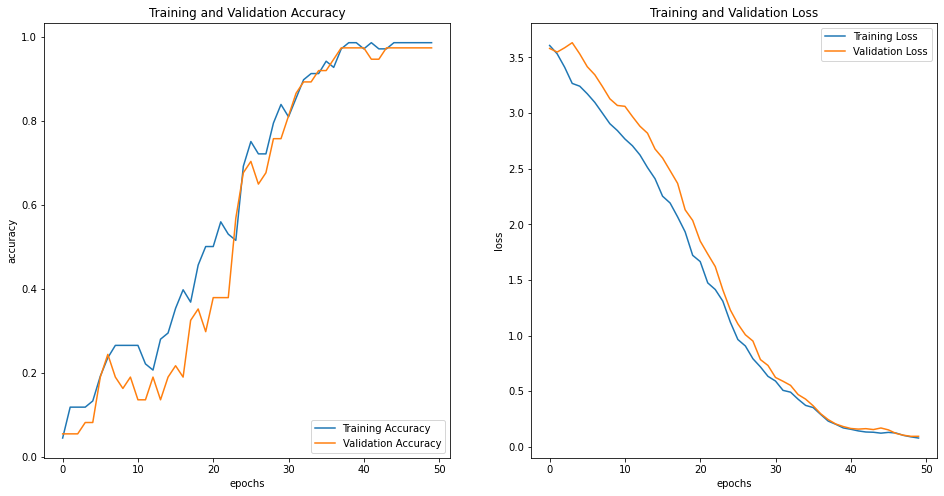

In [67]:
# Learning curves 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()